# Vessel segmentation

In [108]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [109]:
data_path = "./data_labeled"
img1 = nib.load("./data_labeled/sub-000_ses-20110101_desc-angio_N4bfc_brain_mask.nii.gz")
mask1 = nib.load("./data_labeled/sub-000_segmentation.nii.gz")

In [110]:
data = img1.get_fdata()
mask_data = mask1.get_fdata()
data_masked = np.where(mask_data == 1, data, 0)

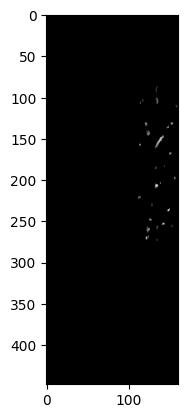

In [111]:
x = data_masked[300, :, :]
plt.imshow(x, cmap="gray")
plt.show()

### Thresholding methods comparison

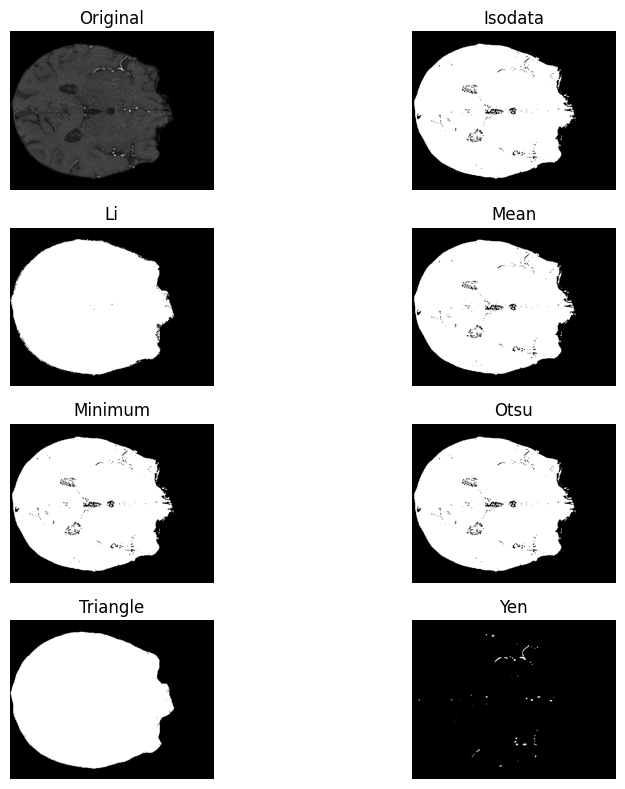

In [112]:
from skimage.filters import try_all_threshold
demo_img = data[:, :, 120]
demo_results = mask_data[:, :, 120]
try_all_threshold(demo_img, figsize=(10, 8), verbose=False)
plt.show()

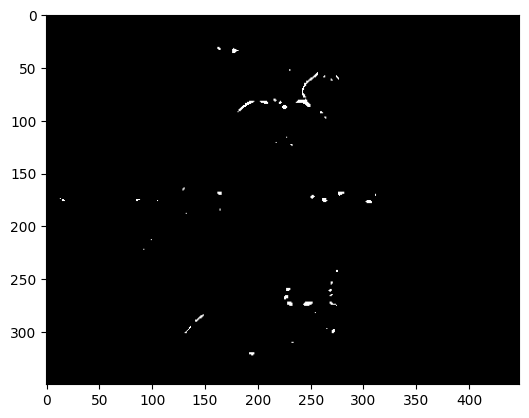

In [113]:
from skimage.filters import threshold_yen

thresh = threshold_yen(demo_img)
masked = demo_img >= thresh
plt.imshow(masked, cmap="gray")
plt.show()

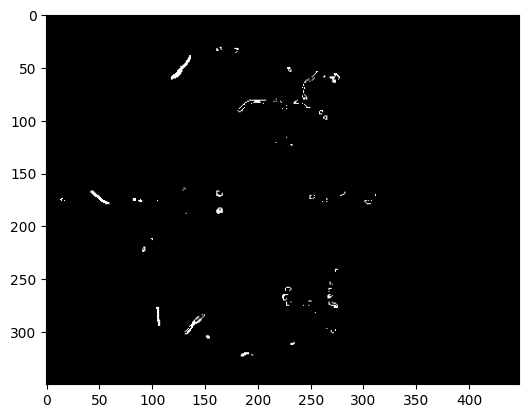

In [114]:
from skimage.util import compare_images

comp_equalized = compare_images(masked, demo_results, method='diff')
plt.imshow(comp_equalized, cmap="gray")
plt.show()

### 

In [115]:
dupa = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
dupa.size

9

In [133]:
def calculate_dice(img1: np.ndarray, img2: np.ndarray):
    assert img1.shape == img2.shape

    numerator = 2 * (img1 == img2).sum()
    denominator = img1.size + img2.size
    return numerator / denominator


In [137]:
float(calculate_dice(masked, demo_results))

0.9954272959183673

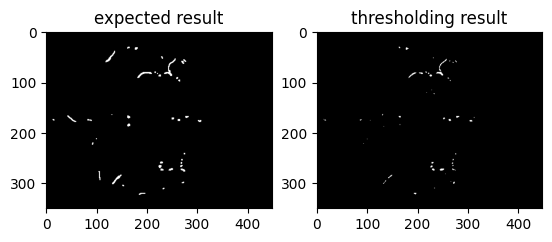

In [138]:
fig, axes = plt.subplots(ncols=2)

axes[0].set_title("expected result")
axes[0].imshow(demo_results, cmap="gray")

axes[1].set_title("thresholding result")
axes[1].imshow(masked, cmap="gray")

plt.show()
